In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer LSTM

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling1D, LSTM, Embedding, Bidirectional
from tensorflow.compat.v1.data import get_output_shapes
from tensorflow.keras.backend import clear_session
from tensorflow.compat.v1 import reset_default_graph
print(tf.__version__)

2.4.1


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset: tf.raw_ops.PrefetchDataset = dataset["train"]
test_dataset: tf.raw_ops.PrefetchDataset = dataset["test"]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0P79JC/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0P79JC/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0P79JC/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer: tfds.deprecated.text.SubwordTextEncoder = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset: tf.raw_ops.ShuffleDataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset: tf.raw_ops.PaddedBatchDataset = train_dataset.padded_batch(BATCH_SIZE, get_output_shapes(train_dataset))
test_dataset: tf.raw_ops.PaddedBatchDataset = test_dataset.padded_batch(BATCH_SIZE, get_output_shapes(test_dataset))

In [6]:
model = Sequential([
    Embedding(input_dim=tokenizer.vocab_size, output_dim=64, name="embedding_1", input_length=None),    # input_length=None表示长度可变
    Bidirectional(LSTM(units=64, return_sequences=True), name="LSTM_2"),
    Bidirectional(LSTM(units=32, return_sequences=False), name="LSTM_3"),
    Dense(units=64, activation='relu', name="dense_4"),
    Dense(units=1, activation='sigmoid', name="dense_5")
], name="IMDBsubwords_classifier")
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)
model.summary()

Model: "IMDBsubwords_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
LSTM_2 (Bidirectional)       (None, None, 128)         66048     
_________________________________________________________________
LSTM_3 (Bidirectional)       (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [7]:
NUM_EPOCHS = 10
history = model.fit(
    train_dataset, 
    validation_data=test_dataset,
    epochs=NUM_EPOCHS, 
    workers=-1,
    use_multiprocessing=True
)

Epoch 1/10
391/391 [==============================] - 106s 244ms/step - loss: 0.6332 - accuracy: 0.6286 - val_loss: 0.5713 - val_accuracy: 0.7116
Epoch 2/10
391/391 [==============================] - 95s 242ms/step - loss: 0.4459 - accuracy: 0.8060 - val_loss: 0.5484 - val_accuracy: 0.7398
Epoch 3/10
391/391 [==============================] - 97s 246ms/step - loss: 0.4894 - accuracy: 0.7642 - val_loss: 0.5995 - val_accuracy: 0.6792
Epoch 4/10
391/391 [==============================] - 96s 244ms/step - loss: 0.4932 - accuracy: 0.7727 - val_loss: 0.4173 - val_accuracy: 0.8246
Epoch 5/10
391/391 [==============================] - 95s 242ms/step - loss: 0.3227 - accuracy: 0.8691 - val_loss: 0.3636 - val_accuracy: 0.8473
Epoch 6/10
391/391 [==============================] - 95s 243ms/step - loss: 0.2368 - accuracy: 0.9132 - val_loss: 0.3371 - val_accuracy: 0.8594
Epoch 7/10
391/391 [==============================] - 96s 244ms/step - loss: 0.1853 - accuracy: 0.9347 - val_loss: 0.3428 - val_a

In [8]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

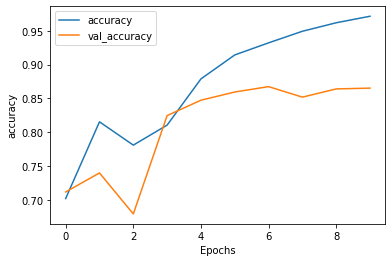

In [9]:
plot_graphs(history, 'accuracy')

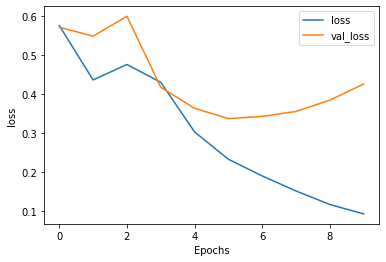

In [10]:
plot_graphs(history, 'loss')